<a href="https://colab.research.google.com/github/SreeBhargaviM/Neural-networks-with-Tensorflow/blob/master/nlp_concatenated_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
train = pd.read_csv('train_clean.csv', engine='python', error_bad_lines=False)
new = pd.read_csv('test.csv', engine='python', error_bad_lines=False)

In [39]:
train.columns

Index(['employee ID', 'Place', 'location', 'date', 'status', 'job_title',
       'summary', 'positives', 'negatives', 'advice_to_mgmt', 'score_1',
       'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'overall'],
      dtype='object')

In [40]:
new.columns

Index(['employeeID', 'Place', 'location', 'date', 'status', 'job_title',
       'summary', 'positives', 'negatives', 'advice_to_mgmt', 'score_1',
       'score_2', 'score_3', 'score_4', 'score_5', 'score_6'],
      dtype='object')

In [41]:
len(train['negatives'])

30298

In [42]:
train = train.sample(frac=1)
new = new.sample(frac=1)

In [43]:
train_data1 = list(train['positives'][:30000])
train_data2 = list(train['negatives'][:30000])

In [44]:
train_data1[-1]

'cool people around, great work going on'

In [45]:
test_data1 = list(train['positives'][30000:])
test_data2 = list(train['negatives'][30000:])

In [46]:
test_data1[1]

'Part Time, Weekly Pay, 4 HR Shifts, Non-Customer contact, a nice job to have to supplement your income.'

In [47]:
for i in range(len(train_data1)):
  train_data1[i] = train_data1[i].lower()
  train_data2[i] = train_data2[i].lower()
for i in range(len(test_data1)):
  test_data1[i] = str(test_data1[i]).lower()
  test_data2[i] = test_data2[i].lower()


In [48]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [49]:
def filter_stop_words(train_sentences, stop_words):
    for i, sentence in enumerate(train_sentences):
        new_sent = [word for word in sentence.split() if word not in stop_words]
        train_sentences[i] = ' '.join(new_sent)
    return train_sentences

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [50]:
stop_words = set(stopwords.words("english"))
train_data1 = np.array(filter_stop_words(train_data1, stop_words))
train_data2 = np.array(filter_stop_words(train_data2, stop_words))
test_data1 = np.array(filter_stop_words(test_data1, stop_words))
test_data2 = np.array(filter_stop_words(test_data2, stop_words))

In [53]:
train_data1[2600]

'educated people, well managed, sales oriented canada. products becoming better.'

In [54]:
tokenizer1 = Tokenizer( num_words = 250, oov_token='<OOV>')
tokenizer1.fit_on_texts(train_data1)
word_index1 = tokenizer1.word_index
vocab_len1 = len(word_index1)
sequences1 = tokenizer1.texts_to_sequences(train_data1)
padded1 = pad_sequences(sequences1,maxlen= 20, truncating= 'post')

testing_sequences = tokenizer1.texts_to_sequences(test_data1)
testing_padded = pad_sequences(testing_sequences,maxlen= 20, truncating= 'post')

In [55]:
tokenizer2 = Tokenizer( num_words = 250, oov_token='<OOV>')
tokenizer2.fit_on_texts(train_data2)
word_index2 = tokenizer2.word_index
vocab_len2 = len(word_index2)
sequences2 = tokenizer2.texts_to_sequences(train_data2)
padded2 = pad_sequences(sequences2,maxlen= 20, truncating= 'post')

testing_sequences2 = tokenizer2.texts_to_sequences(test_data2)
testing_padded2 = pad_sequences(testing_sequences2,maxlen= 20, truncating= 'post')

In [56]:
len(word_index2)

20725

In [57]:
np.shape(padded2)

(30000, 20)

In [58]:
train_labels = np.array(list(train['overall'][:30000]))
test_labels = np.array(list(train['overall'][30000:]))

In [59]:
train_label1 = tf.keras.utils.to_categorical(train_labels)
test_label1 = tf.keras.utils.to_categorical(test_labels)

In [67]:
input1 = tf.keras.layers.Input(shape=(20,))
x = tf.keras.layers.Embedding(250, 24, input_length=20)(input1)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))(x)
x = tf.keras.layers.LSTM(16, dropout=0.2, recurrent_dropout=0.2)(x)
#x = tf.keras.layers.Dense(16, activation='relu')(x)

In [68]:
input2 = tf.keras.layers.Input(shape=(20,))
y = tf.keras.layers.Embedding(250, 24, input_length=20)(input2)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))(y)
y = tf.keras.layers.LSTM(16, dropout=0.2, recurrent_dropout=0.2)(y)
#y = tf.keras.layers.Dense(16, activation='relu')(y)

In [69]:
comb = tf.keras.layers.Concatenate()([x,y])
#fin_dense = tf.keras.layers.Dense(8, activation='relu')(comb)
fin = tf.keras.layers.Dense(6, activation='softmax')(comb)


In [70]:
model = tf.keras.Model(inputs=[input1, input2], outputs=fin)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 20, 24)       600000      input_5[0][0]                    
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 20, 24)       600000      input_6[0][0]                    
_______________________________________________________________________________________

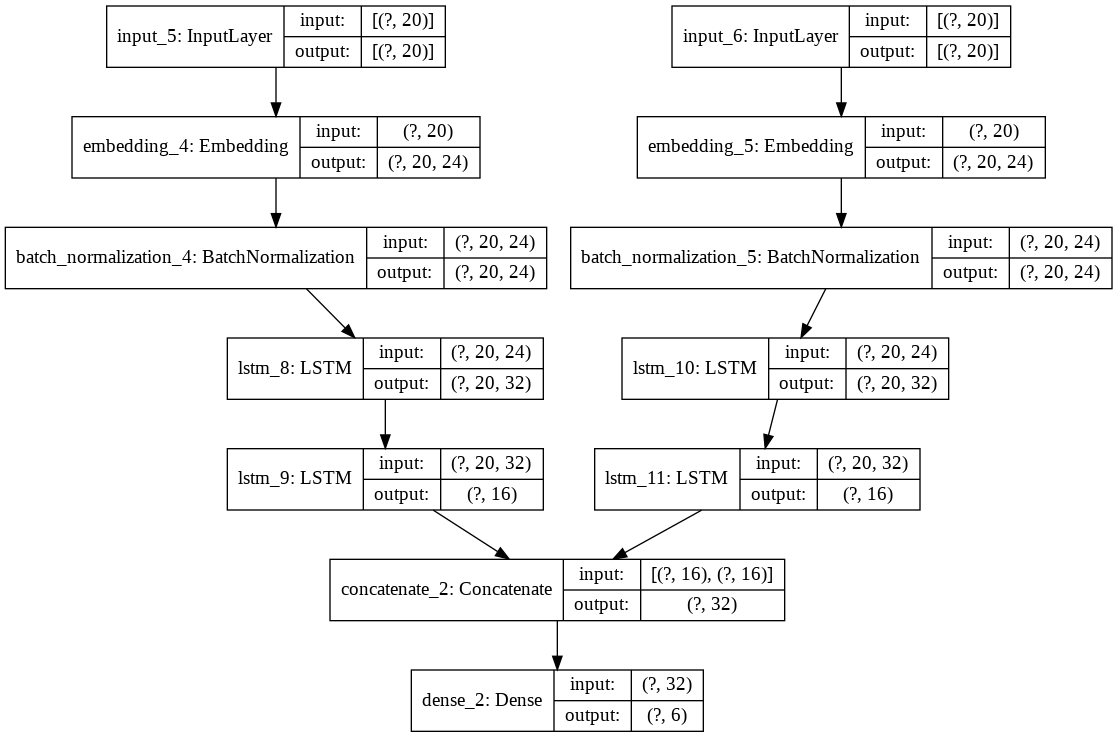

In [71]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [74]:
history = model.fit(x=[padded1, padded2], y=train_label1, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
211/211 [==============================] - 21s 99ms/step - loss: 0.3004 - acc: 0.8913 - val_loss: 1.8057 - val_acc: 0.5503
Epoch 2/5
211/211 [==============================] - 21s 99ms/step - loss: 0.2768 - acc: 0.8983 - val_loss: 1.9028 - val_acc: 0.5397
Epoch 3/5
211/211 [==============================] - 21s 99ms/step - loss: 0.2637 - acc: 0.9028 - val_loss: 1.9857 - val_acc: 0.5300
Epoch 4/5
211/211 [==============================] - 21s 100ms/step - loss: 0.2525 - acc: 0.9083 - val_loss: 2.0519 - val_acc: 0.5287
Epoch 5/5
211/211 [==============================] - 21s 99ms/step - loss: 0.2363 - acc: 0.9133 - val_loss: 2.1415 - val_acc: 0.5290


In [75]:
accr = model.evaluate([testing_padded, testing_padded2],test_label1)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

10/10 [==============================] - 0s 6ms/step - loss: 1.9393 - acc: 0.5268
Test set
  Loss: 1.939
  Accuracy: 0.527
